# Logistic Regression using Python

Logistic Regression is one of the most popular supervised learning algorithms used to solve classification problems. This algorithm work particularly well with binary classification problem. But it can solve multi-class problems as well. In this tutorial we will try to solve a multi class problem using Logistic Regression.

## About the Data
#### Digits Dataset
**Loading the Dataset**
The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

Taking a look at the data. Using print to show that there are 1797 images (8 by 8 images for a dimensionality of 64). Also, print to show there are 1797 labels (integers from 0–9).

In [2]:
print(' Image Data Shape ', digits.data.shape)

print(' Label Data Shape ', digits.target.shape)

 Image Data Shape  (1797, 64)
 Label Data Shape  (1797,)


### Using numpy and matplotlib to show the images and corrsponding labels

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

Text(0.5, 1.0, 'Data Distribution')

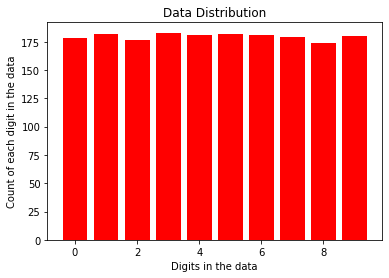

In [27]:
# Checking the data distribution
distribution = np.unique(digits.target, return_counts=True)
plt.bar(distribution[0], distribution[1], color = 'r')
plt.ylabel('Count of each digit in the data')
plt.xlabel('Digits in the data')
plt.title('Data Distribution')

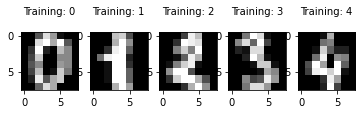

In [4]:
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 10)
    

### Splitting the data into train and test sets and keeping the split ratio as 75% for training and 25% for testing

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Scikit-learn 4-steps Modelling Pattern

#### Step 1 : Import the model you want to use
For our case we will import the LogisticRegression model

In [0]:
from sklearn.linear_model import LogisticRegression

#### Step 2 : Making an instance of the model
For our case, all parameters not specified and are set to their defaults

In [0]:
model = LogisticRegression()

#### Step 3 : Training the selected model on the data, storing the information learned from the data
Model is learning the relationship between x (digits) and y (labels)

In [8]:
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Step 4 : Predict the labels of new data-set (new images)
Uses the information the model learned during the model training process

In [9]:
# Predict for One Observation (image)
model.predict(x_test[0].reshape(1,-1))

array([2])

In [10]:
# Predict for Multiple Observations (images) at Once
model.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [0]:
# Store all predictions in one variable for the testing data-set
predictions = model.predict(x_test)

### Model Evaluation Metrics

During the lecture, we have talked about primarily the following evaluation parameters to test the performance of the model on the data-set selected:
1. Accuracy
2. Confusion Matrix
3. Precision
4. Recall
5. AUC
6. F1-score

Here, we will go through each of these parameters and we will ecavluate our model performance using these.

#### Accuracy - Defined as rate of correct prediction

In [12]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, predictions)
print('Accuracy is:',accuracy)

Accuracy is: 0.9511111111111111


#### Confusion Matrix - Defined as the summary of prediction results on a classification problem.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


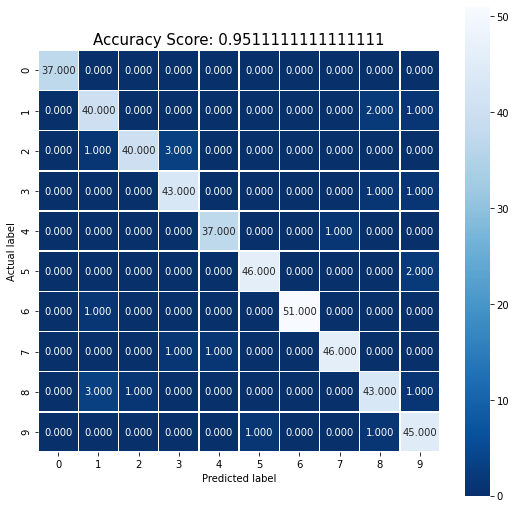

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

#### Precision - Ratio of correctly positive case to total predicted positive

In [15]:
from sklearn import metrics

# For precision of each class individually use average= None
precision = metrics.precision_score(y_test, predictions, average='macro')
print('Precision is:',precision)

Precision is: 0.9525416898065957


#### Recall - Ratio of the total number of correctly classified positive examples divide to the total number of positive examples

In [16]:
from sklearn import metrics

# For recall of each class individually use average= None
recall = metrics.recall_score(y_test, predictions, average='macro')
print('Recall is:',recall)

Recall is: 0.9519279272592186


#### AUC - AUC provides an aggregate measure of performance across all possible classification thresholds

In [17]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
        lb = LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        y_pred = lb.transform(y_pred)
        return metrics.roc_auc_score(y_test, y_pred, average=average)
auc_score = multiclass_roc_auc_score(y_test, predictions)
print('AUC score is:', auc_score)

AUC score is: 0.9732447578709469


#### F1 – Score : It is measure of giving certain weightage to precision and recall values

In [18]:
from sklearn import metrics

# For recall of each class individually use average= None
f1_score_value = metrics.f1_score(y_test, predictions, average='macro')
print('F1 Score is:',f1_score_value)

F1 Score is: 0.9518965775741322
